In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow


     ------------------------------------ 272.8/272.8 MB 625.6 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 300.8 kB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (py

In [14]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [16]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [18]:
X_train = []
y_train = []
image_size = 150

folderPath =r'C:\Users\intern\Downloads\healthycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath =r'C:\Users\intern\Downloads\lumpycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(936, 150, 150, 3)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [21]:
y_train.shape

(842,)

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [24]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [32]:
history=model.fit(X_train,y_train,epochs=100,validation_split=.1,callbacks=[best_model])

Epoch 1/100
24/24 [==============================] - 84s 3s/step - loss: 0.3179 - accuracy: 0.8732 - val_loss: 0.4369 - val_accuracy: 0.8000
Epoch 2/100
24/24 [==============================] - 83s 3s/step - loss: 0.3077 - accuracy: 0.8785 - val_loss: 0.4203 - val_accuracy: 0.8235
Epoch 3/100
24/24 [==============================] - 83s 3s/step - loss: 0.2935 - accuracy: 0.8745 - val_loss: 0.5400 - val_accuracy: 0.8000
Epoch 4/100
24/24 [==============================] - 84s 3s/step - loss: 0.2878 - accuracy: 0.8679 - val_loss: 0.6570 - val_accuracy: 0.7412
Epoch 5/100
24/24 [==============================] - 84s 3s/step - loss: 0.2522 - accuracy: 0.9022 - val_loss: 0.5017 - val_accuracy: 0.8471
Epoch 6/100
24/24 [==============================] - 84s 3s/step - loss: 0.2394 - accuracy: 0.9062 - val_loss: 0.5010 - val_accuracy: 0.8235
Epoch 7/100
24/24 [==============================] - 83s 3s/step - loss: 0.2651 - accuracy: 0.8943 - val_loss: 0.7072 - val_accuracy: 0.7765
Epoch 8/100
2

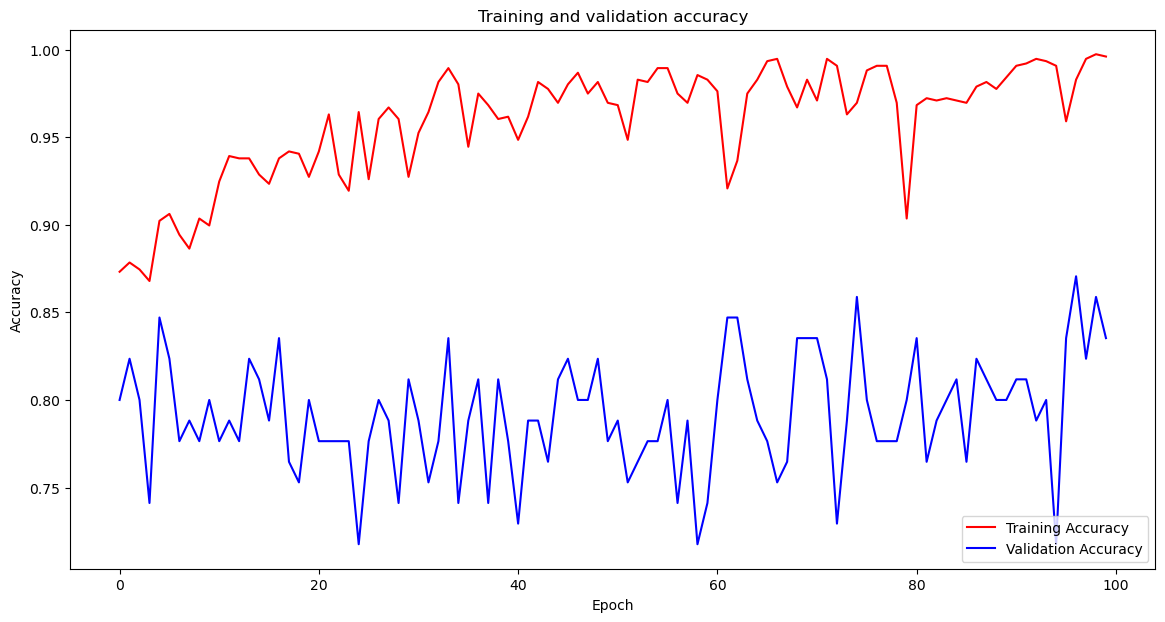

In [33]:
#model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

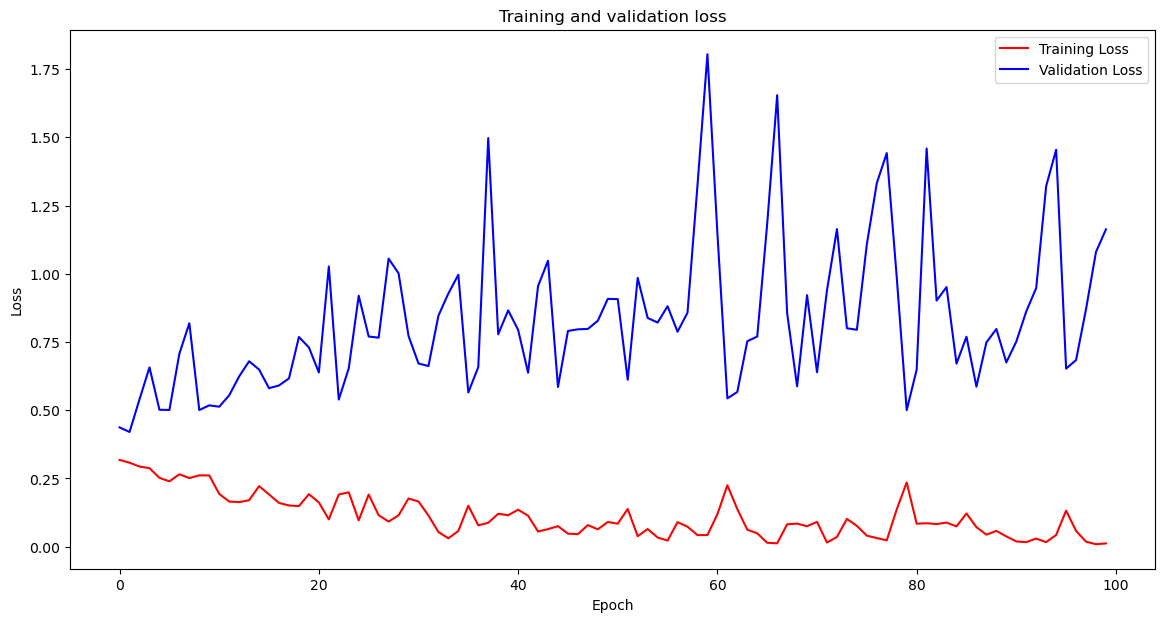

In [34]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [35]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

3/3 [==============================] - 2s 803ms/step


In [36]:
y_test.shape
pred.shape

(94,)

In [37]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 75.53%
